# HW5: 4th-order Runge-Kutta (rk4)

Recall, we are trying to solve the ODE, $dx/dt = F(x,t)$.

$F(x,t)$ will be considered at four
  different locations.
For each $x^n$ and $t^n$ we define four different coordinates:
\begin{eqnarray*} \label{eq:rk}
k_1 &=& F(x^n, t^n) \\
k_2 &=& F\left (x^n + \frac{1}{2} k_1 \Delta t, t^n + \frac{\Delta
        t}{2} \right) \\
k_3 &=& F\left (x^n + \frac{1}{2} k_2 \Delta t, t^n + \frac{\Delta
        t}{2} \right)\\
k_4 &=& F\left (x^n + k_3 \Delta t, t^n + \Delta t \right )
\end{eqnarray*}

With these values defined we are now ready to execute the next time step:

\begin{equation*}
x^{n+1} = x^n + \tfrac{1}{6} (k_1 + 2k_2 + 2k_3 + k_4) \Delta t
\end{equation*}


- Repeat the last part of Lab 2 (trunctation error), solving the dimensionless ODE, comparing the %error at $\tau = 1$ . Plot \%error vs. $d \tau$. Is 4th-order Runge-Kutta $\propto \Delta t^4$  (plot log-log)?  Hint, I found the error for rk4 can be extremely small so that the linear relation failed for very small $\Delta \tau$.

Y Exact
0.36787944117144233
 
Y approx
0.36788523812530194
Y approx
0.3678797744124984
Y approx
0.3678794611475396
Y approx
0.3678794416701937
Y approx
0.3678794412023554
Y approx
0.36787944117336646
Y approx
0.3678794411714909
Y approx
0.3678794411714464
Y approx
0.3678794411714433
Y approx
0.367879441171445
 


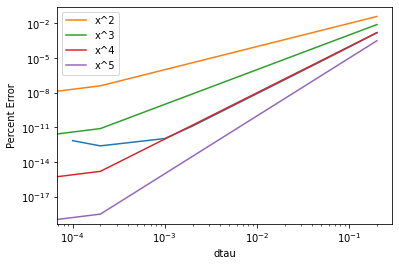

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------- 
def F(y0):
  return -y0
#-------------------------------------------------------------------------------
#Function: Cooling Cup ODE Solver using Runge Kutta
#Parameters: Function used, dimensionless timespace, initial temp, number of intervals, and delta tau
def RungeKutta_FourthOrder(F, tau, y0, num_intervals, dtau):
    #Solution Space for Computed Fit
    y = []
    #Setting initial temp
    y.append(y0)
    #Loop through 4th Order Runge-Kutta method
    for i in range(0,len(tau)):
      k1 = F(y0)*dtau
      k2 = F(y0 + 0.5*k1)*dtau
      k3 = F(y0 + 0.5*k2)*dtau
      k4 = F(y0 + k3)*dtau
      yp = y0 + (k1 + 2*k2 + 2*k3 + k4)/6
      y.append(yp)
      y0 = yp
    return y
#-------------------------------------------------------------------------------
#Initializing my variables
N = np.array([5,10,20,50,100,200,500,1000,5000,10000])
tau_i = 0
tau_f = 1
y0 = 1
percentError = np.zeros(len(N))
deltaTaus = np.zeros(len(N))

#Getting the exact value
tau_real = np.linspace(0,1,10000)
print('Y Exact')
print(np.exp(-tau_real[-1]))
print(' ')


for i in range(0,len(N)):
  #Time Space from 0 to 1 (in minutes) [time step size editable]
  tau = np.linspace(tau_i,tau_f,N[i])
  #Finding dtau
  dtau = (tau_f - tau_i)/N[i]
  deltaTaus[i] = dtau
  y_approx = RungeKutta_FourthOrder(F, tau, y0, N[i], dtau)
  print('Y approx')
  print(y_approx[-1])
  percentError[i] = 100*np.abs((y_approx[-1] - np.exp(-tau[-1]))/np.exp(-tau[-1]))

#Creating exponential functions for error comparison
x_real = np.linspace(0,.2,1000)
xpowers = [x_real**2, x_real**3, x_real**4, x_real**5]

#Printing the percent error vs dtau and different exponentials
print(' ')
plt.plot(deltaTaus, percentError)
plt.loglog(x_real, xpowers[0], label='x^2')
plt.loglog(x_real, xpowers[1], label='x^3')
plt.loglog(x_real, xpowers[2], label='x^4')
plt.loglog(x_real, xpowers[3], label='x^5')
plt.xlabel('dtau')
plt.ylabel('Percent Error')
plt.legend()

#Showing that this is a fourth order ODE solver
#Error at the end is due to error going down to machine precision